In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/SAE.csv')

### First we will need to find the labels from the documentation for Serious Adverse Events (SAE)

In [3]:
labels = {'SAE002':'SAE_name','SAE003':'SAE_description','SAE006A':'SAE_cat_death',
          'SAE006B':'SAE_cat_life_threat','SAE006C':'SAE_cat_hosp','SAE006D':'SAE_cat_disability',
          'SAE007':'SAE_severity','SAE011':'SAE_outcome'}

In [4]:
data.rename(columns=labels, inplace=True)

In [5]:
data.columns

Index(['PATIENTNUMBER', 'CT_RECID', 'DB_ID', 'CTS_REASON', 'CTPROT', 'INVSITE',
       'PATID', 'SUBJNO', 'INITIALS', 'FORM', 'BLOCKREP', 'PAGEID', 'PAGEREP',
       'CRFPAGE', 'NODATA', 'PATIENTID', 'VISITID', 'VISITINDEX', 'FORMINDEX',
       'ITEMSETINDEX', 'VSWKAE', 'VSDTAE', 'SAE00A', 'SAE001', 'SAE001A',
       'SAE_name', 'SAE_description', 'SAE004', 'SAE005', 'SAE_cat_death',
       'SAE_cat_life_threat', 'SAE_cat_hosp', 'SAE_cat_disability', 'SAE006E',
       'SAE006E1', 'SAE006E2', 'SAE006E3', 'SAE006E4', 'SAE006E5', 'SAE006F',
       'SAE_severity', 'SAE0081', 'SAE009', 'SAE010', 'SAE_outcome', 'SAE011A',
       'MEDRCODE', 'WORKFLOW', 'CODETM', 'CODER', 'CONFLVL', 'MATCHES',
       'MEDRTEXT', 'SAE0082', 'SAE0083', 'SAE0084', 'SAE0085', 'SAE0086',
       'SAE0087', 'SAE0088', 'VISWKAE', 'VSDTAE_DT', 'SAE004_DT', 'SAE005_DT',
       'SAE011A_DT', 'patdeid'],
      dtype='object')

In [6]:
data[:10]

,PATIENTNUMBER,CT_RECID,DB_ID,CTS_REASON,CTPROT,INVSITE,PATID,SUBJNO,INITIALS,FORM,BLOCKREP,PAGEID,PAGEREP,CRFPAGE,NODATA,PATIENTID,VISITID,VISITINDEX,FORMINDEX,ITEMSETINDEX,VSWKAE,VSDTAE,SAE00A,SAE001,SAE001A,SAE_name,SAE_description,SAE004,SAE005,SAE_cat_death,SAE_cat_life_threat,SAE_cat_hosp,SAE_cat_disability,SAE006E,SAE006E1,SAE006E2,SAE006E3,SAE006E4,SAE006E5,SAE006F,SAE_severity,SAE0081,SAE009,SAE010,SAE_outcome,SAE011A,MEDRCODE,WORKFLOW,CODETM,CODER,CONFLVL,MATCHES,MEDRTEXT,SAE0082,SAE0083,SAE0084,SAE0085,SAE0086,SAE0087,SAE0088,VISWKAE,VSDTAE_DT,SAE004_DT,SAE005_DT,SAE011A_DT,patdeid
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,213611057334096,0.0,NaN,NaN,1,1.0,NaN,SPONTANEOUS ABORTION,"CLIENT WAS 9 5/7 WEEKS GESTATIONAL, COMPLAINED...",NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0,NaN,10041687.0,AUTO,NaN,NaN,1.0,1.0,SPONTANEOUS ABORTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,46.0,43.0,43.0,NaN,28.0
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,234982019356080,0.0,NaN,NaN,2,1.0,NaN,CONCUSSION,SEEN IN EMERGENCY ROOM ON 6/5/08 AFTER SUSTAIN...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0,1.0,1.0,0.0,2.0,NaN,10010254.0,AUTO,NaN,NaN,1.0,1.0,CONCUSSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,159.0,153.0,153.0,NaN,76.0
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,280158038454072,0.0,NaN,NaN,1,1.0,NaN,RUPTURE OF PRE-EXISTING STOMACH ULCER,PPT HAD A RUPTURE OF A PRE-EXISITNG STOMACH UL...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0,1.0,1.0,0.0,1.0,NaN,10017835.0,INT,NaN,NaN,NaN,NaN,GASTRIC ULCER PERFORATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,43.0,41.0,42.0,NaN,88.0
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,283189863390088,0.0,NaN,NaN,4,1.0,NaN,LUMBAR FRACTURE,L1 COMPRESSION FRACTURE REQUIRING HOPITALIZATI...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,NaN,10049947.0,INT,NaN,NaN,NaN,NaN,LUMBAR VERTEBRAL FRACTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,78.0,73.0,132.0,NaN,88.0
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,284401723789026,0.0,NaN,NaN,6,1.0,NaN,STOMACH BLEEDING,PPT WAS HOSPITALIZED FOR STOMACH BLEEDING,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0,1.0,1.0,0.0,1.0,NaN,10017757.0,INT,NaN,NaN,NaN,NaN,GASTRIC BLEEDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,92.0,86.0,88.0,NaN,88.0
5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,289406680092069,0.0,NaN,NaN,7,1.0,NaN,FATAL OVERDOSE; SPECIFICS UNK,FATAL OVERDOSE,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,5.0,1.0,1.0,0.0,4.0,NaN,10033295.0,INT,NaN,NaN,NaN,NaN,OVERDOSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,150.0,132.0,132.0,132.0,88.0
6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,271951758534014,0.0,NaN,NaN,6,1.0,NaN,HOSPITALIZATION WITH RIGHT HAND CELLULITIS,PARTICIPANT CAME IN TODAY AND DISCLOSED THAT S...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,NaN,10049022.0,INT,NaN,NaN,NaN,NaN,CELLULITIS OF HAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,248.0,235.0,238.0,NaN,109.0
7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,262186775413041,0.0,NaN,NaN,3,1.0,NaN,HOSPITALIZATION WITH PNEUMONIA,PARTICIPANT REPORTED TODAY ON 4/23/09 THAT SHE...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,1.0,0.0,1.0,NaN,10035664.0,INT,NaN,NaN,NaN,NaN,PNEUMONIA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,80.0,78.0,79.0,NaN,116.0
8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,201434300787067,0.0,NaN,NaN,4,1.0,NaN,ACCIDENTAL XANAX OVERDOSE,"SHE WAS NOTED TO BE SOMMULENT & NODDING,APPARE...",NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,2.0,0.0,1.0,NaN,10013737.0,INT,NaN,NaN,NaN,NaN,DRUG OVERDOSE ACCIDENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,71.0,62.0,62.0,NaN,213.0
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15115,1,182879792603090,0.0,

In [7]:
# look at labels and see if there are any interesting discoveries

sae_df = data.loc[:,['patdeid','SAE_name', 'SAE_description','MEDRTEXT','SAE_severity', 
                     'SAE_outcome','SAE_cat_death','SAE_cat_life_threat', 'SAE_cat_hosp', 
                     'SAE_cat_disability']]

In [8]:
sae_df.SAE_description.values

array(['CLIENT WAS 9 5/7 WEEKS GESTATIONAL, COMPLAINED OF CRAMPING AND VAGINAL BLEEDING.  DIAGNOSED WITH MISCARRIAGE ON 10/5/07 THEREFORE A D&C WAS PERFORMED.',
       'SEEN IN EMERGENCY ROOM ON 6/5/08 AFTER SUSTAINING HEAD TRAUMA.  DIAGNOSED WITH A CONCUSSION, RELEASED FROM EMERGENCY ROOM PER PATIENT REPORT.  STILL EXPERIENCING POST-CONCUSSION SYNDROME.  DISCHARGE REPORT PENDING.',
       'PPT HAD A RUPTURE OF A PRE-EXISITNG STOMACH ULCER THAT WAS DIAGNOSED IN 2003. PPT HOSPITALIZED ON 11/15/09 AND RELEASED ON 11/16/09',
       'L1 COMPRESSION FRACTURE REQUIRING HOPITALIZATION RESULTING FROM BEING HIT BY CAR (PPT PEDESTRIAN). HOSPITALIZATION DATES: 12/17/09 - 12/19/09',
       'PPT WAS HOSPITALIZED FOR STOMACH BLEEDING', 'FATAL OVERDOSE',
       'PARTICIPANT CAME IN TODAY AND DISCLOSED THAT SHE WAS HOSPITALIZED WITH RIGHT HAND CELLULITIS FROM 7-31-09 TO 8-3-09 AND RECEIVED I-V ANTIBIOTICS TREATMENT. DID NOT PROVIDE ANY DOSAGE INFO OR THE NAME OF ANTIBIOTICS',
       'PARTICIPANT REPOR

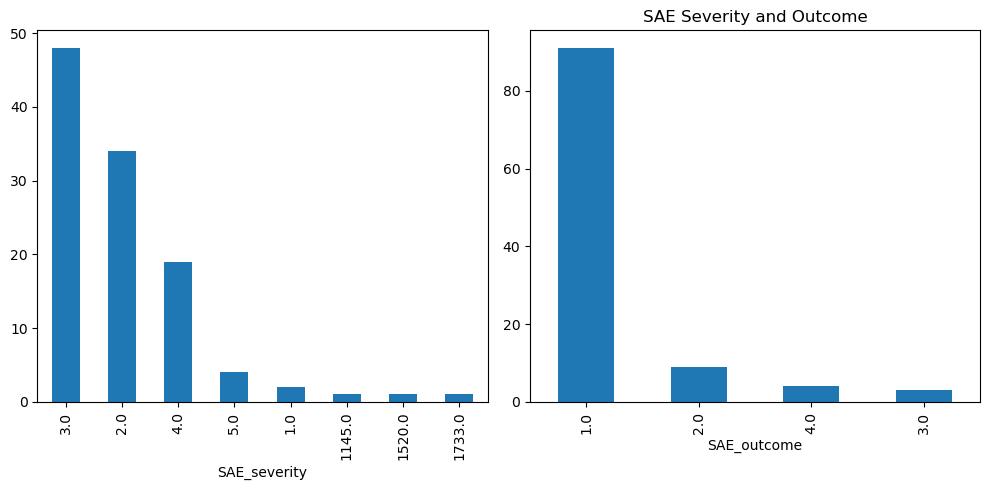

In [55]:

fig, ax = plt.subplots(1,2, figsize=(10,5))
sae_df.SAE_severity.value_counts().plot(kind='bar', ax=ax[0]) 
sae_df.SAE_outcome.value_counts().plot(kind='bar', ax=ax[1])
plt.title('SAE Severity and Outcome')
plt.tight_layout()
plt.show()